In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics 
from math import sqrt

In [2]:
#   load the data into the dataframe

df = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal = ",")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [5]:
# check for th null values

df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [6]:
df = df[df['Date'].notnull()]

In [7]:
df.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [8]:
# drop the unnamed column

df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1)

In [9]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [10]:
# convert date time column to datetime
df['DateTime'] = (df.Date) + ' ' + (df.Time)
print (type(df.DateTime[0]))

<class 'str'>


In [11]:
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))
print (type(df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
df.index = df.DateTime

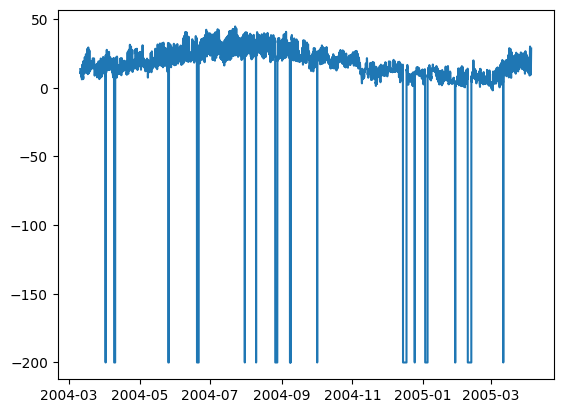

In [13]:
plt.plot(df['T'])

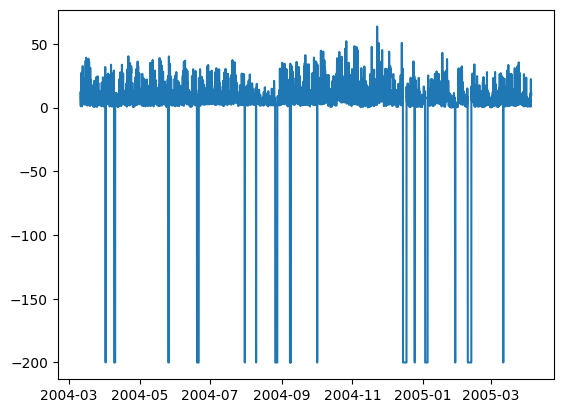

In [14]:
plt.plot(df['C6H6(GT)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1290f23f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1291e24b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1291e1c40>,
 'medians': [<matplotlib.lines.Line2D at 0x1291e2a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1291e2cf0>,
 'means': []}

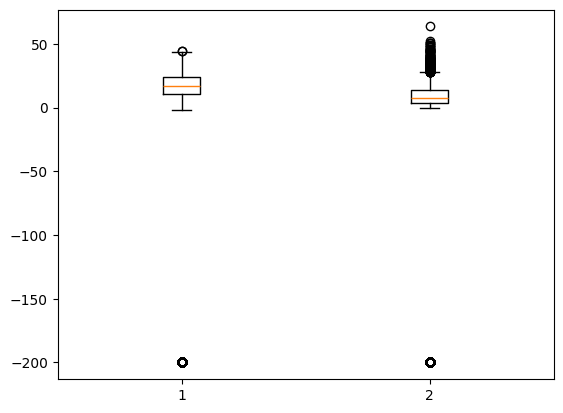

In [15]:
# boxplots 
plt.boxplot(df[['T','C6H6(GT)']].values)

In [16]:
print (
'Mean: ' , numpy. mean( df[ 'T' ]),
'Standard Deviation: ' , numpy. std( df[ 'T' ]),

'Maximum Temperature:' , max( df[ 'T' ]),
'Minimum Temperature: ' , min( df[ 'T' ])
)

Mean:  9.778305012290264 Standard Deviation:  43.201314375146595 Maximum Temperature: 44.6 Minimum Temperature:  -200.0


In [17]:
df['T']

DateTime
2004-03-10 18:00:00    13.6
2004-03-10 19:00:00    13.3
2004-03-10 20:00:00    11.9
2004-03-10 21:00:00    11.0
2004-03-10 22:00:00    11.2
                       ... 
2005-04-04 10:00:00    21.9
2005-04-04 11:00:00    24.3
2005-04-04 12:00:00    26.9
2005-04-04 13:00:00    28.3
2005-04-04 14:00:00    28.5
Name: T, Length: 9357, dtype: float64

In [18]:
df['T_t-1'] = df['T'].shift(1)

In [19]:
df_naive = df[['T','T_t-1']][1:]

In [20]:

true = df_naive['T']
prediction = df_naive['T_t-1']
error = sqrt(metrics.mean_squared_error(true,prediction)) 
print ('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  12.901140576492974


In [21]:
# Showing 2 nd naïve method
df['T_rm'] = df['T'].rolling(3).mean().shift(1)
df_naive = df[['T','T_rm']].dropna()

In [22]:
true = df_naive['T']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true,prediction)) 
print ('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  14.957633272839242


In [23]:
# Showing ACP
split = len(df) - int(0.2*len(df))
train, test = df['T'][0:split], df['T'][split:]

In [26]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 500.4 kB/s eta 0:00:00a 0:00:01


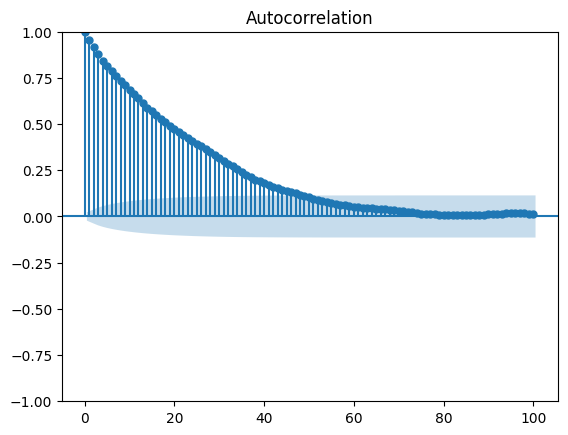

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train, lags = 100) 
plt.show()